## Gender indicators in SG - Graduates by First Degree Course
#### This notebook compares the number of female to male first degree graduates by courses.

#### Data sets:

1) Graduates From University First Degree Courses By Type Of Course
URL: [https://data.gov.sg/dataset/graduates-from-university-first-degree-courses-by-type-of-course](https://data.gov.sg/dataset/graduates-from-university-first-degree-courses-by-type-of-course)    


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from textwrap import wrap
import os

#set plot aesthetics
rcParams['axes.titlesize'] = 18
rcParams['axes.titlepad'] = 15
rcParams['axes.labelsize'] = 14
rcParams['axes.labelpad'] = 10
rcParams["figure.titlesize"] = 18

%matplotlib inline

In [2]:
#load csv
file6 = "data/graduates-from-university-first-degree-courses-by-type-of-course.csv"
data6 = pd.read_csv(file6)

#### Data exploration and transformation

In [3]:
print(data6.info())
print("Min year: {}".format(data6['year'].min()))
print("Max year: {}".format(data6['year'].max()))
print("Courses: {}".format(data6['type_of_course'].unique()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 4 columns):
year               660 non-null int64
sex                660 non-null object
type_of_course     660 non-null object
no_of_graduates    660 non-null object
dtypes: int64(1), object(3)
memory usage: 20.7+ KB
None
Min year: 1993
Max year: 2014
Courses: ['Education' 'Applied Arts' 'Humanities & Social Sciences'
 'Mass Communication' 'Accountancy' 'Business & Administration' 'Law'
 'Natural, Physical & Mathematical Sciences' 'Medicine' 'Dentistry'
 'Health Sciences' 'Information Technology' 'Architecture & Building'
 'Engineering Sciences' 'Services']


In [4]:
#change no_of_graduates to numeric dtype
data6.loc[:,'no_of_graduates'] = pd.to_numeric(data6['no_of_graduates'], errors = 'coerce')
print("Null values in data:")
print(data6.isnull().sum())

Null values in data:
year                0
sex                 0
type_of_course      0
no_of_graduates    60
dtype: int64


In [5]:
#drops rows for which there is no data on number of graduates
data6.dropna(axis=0, inplace = True)

print(data6.shape)
data6.head()

(600, 4)


,year,sex,type_of_course,no_of_graduates
2,1993,Males,Humanities & Social Sciences,481.0
4,1993,Males,Accountancy,295.0
5,1993,Males,Business & Administration,282.0
6,1993,Males,Law,92.0
7,1993,Males,"Natural, Physical & Mathematical Sciences",404.0


In [6]:
#reshape data from long to wide format to facilitate analysis
data6_reshape=data6.groupby(['year']).apply(lambda x:x.pivot(index='type_of_course', columns='sex', values='no_of_graduates'))
data6_reshape.columns.name = None #drop multilevel
data6_reshape.reset_index(inplace=True) #reset index to get columns back

years= data6_reshape['year'].unique()

#calculate total number of female and male graduates for each year and append to data
for year in years:
    year_subset = data6_reshape[data6_reshape['year']==year]
    total = pd.DataFrame([[year, 'Total', year_subset['Females'].sum(), year_subset['Males'].sum()]], 
                         columns=['year','type_of_course','Females','Males']) #create row
    data6_reshape = pd.concat([data6_reshape,total], axis=0, ignore_index=True)

#calculate ratio of females to males
data6_reshape['Ratio of females to males']=data6_reshape['Females']/data6_reshape['Males'] 

In [7]:
data6_reshape.head()

,year,type_of_course,Females,Males,Ratio of females to males
0,1993,Accountancy,396.0,295.0,1.342373
1,1993,Architecture & Building,144.0,132.0,1.090909
2,1993,Business & Administration,708.0,282.0,2.510638
3,1993,Dentistry,11.0,14.0,0.785714
4,1993,Engineering Sciences,254.0,1496.0,0.169786


#### Plot bar charts

In [8]:
#bar chart function to show ratio of females/males graduates in dataset
def barchart_firstdegree(df):
    
    fig,ax = plt.subplots(figsize=(10,8))

    #plot barchart using 'hue' to specify a color so that function can take data subsets with a single year or multiple years
    sns.barplot(x='Ratio of females to males', y='type_of_course', hue='year', palette = 'Paired', data=df)

    ax.set_title("Ratio of females to male graduates from first degree courses")
    ax.set_xlabel("Ratio of females to males")
    ax.set_ylabel("")
    
    #plot reference line showing parity
    ax.axvline(1, linewidth = 1, linestyle = '--', color='#929791', label = 'Parity')
      
    plt.legend()
    
    #generate a filename based on years in dataset 
    years = list(df['year'].unique())
    string = '_'.join(str(year) for year in years)

    filename = "generatedplots/"+ string + "_ratio_firstdegree.png"

    #save plot and display
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()


In [9]:
#create folder for saving plots
def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory. ' +  directory)
        
createFolder('./generatedplots/')

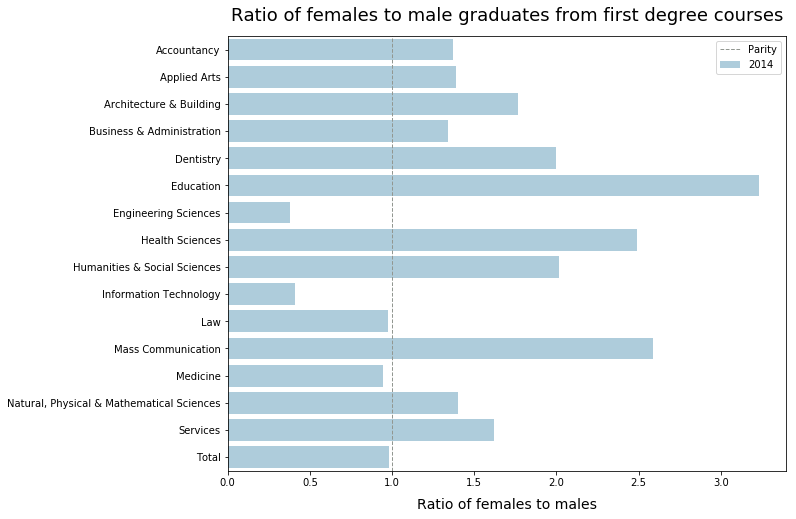

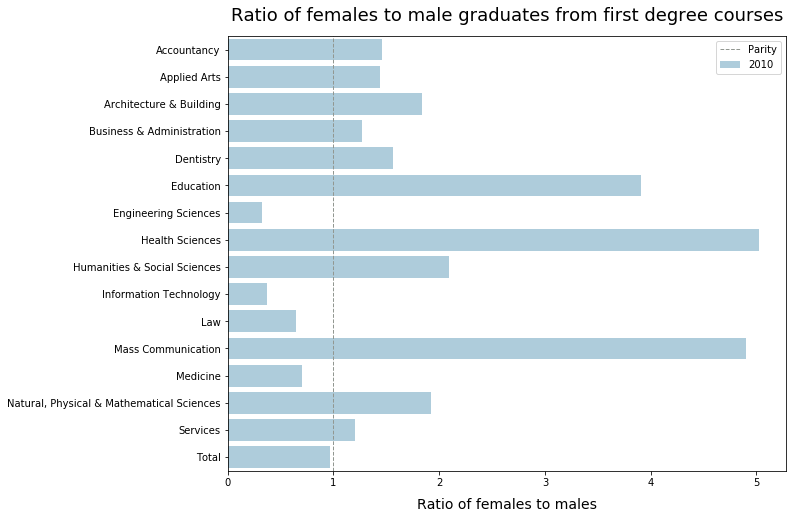

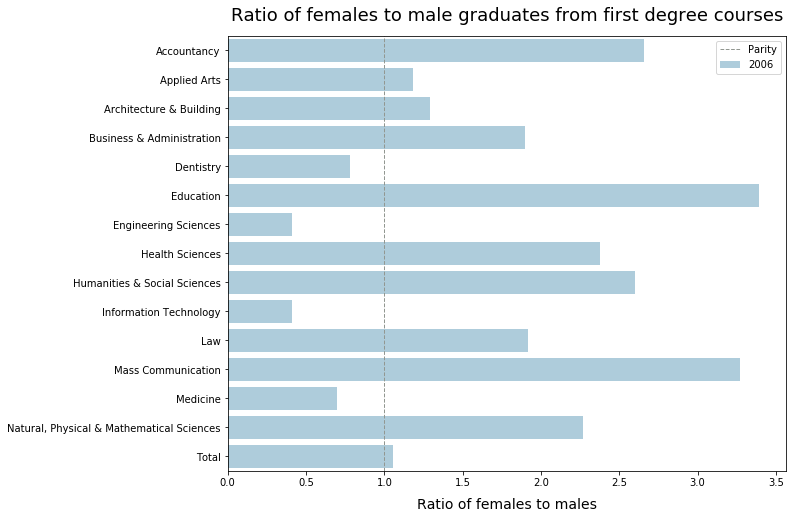

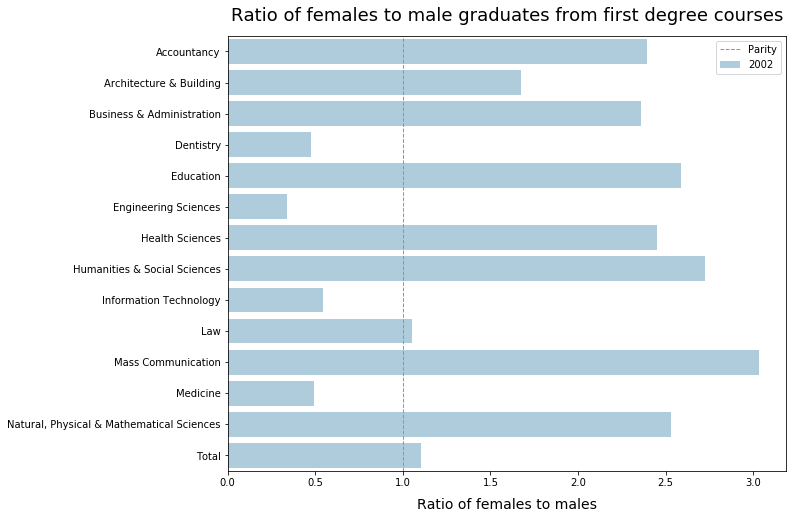

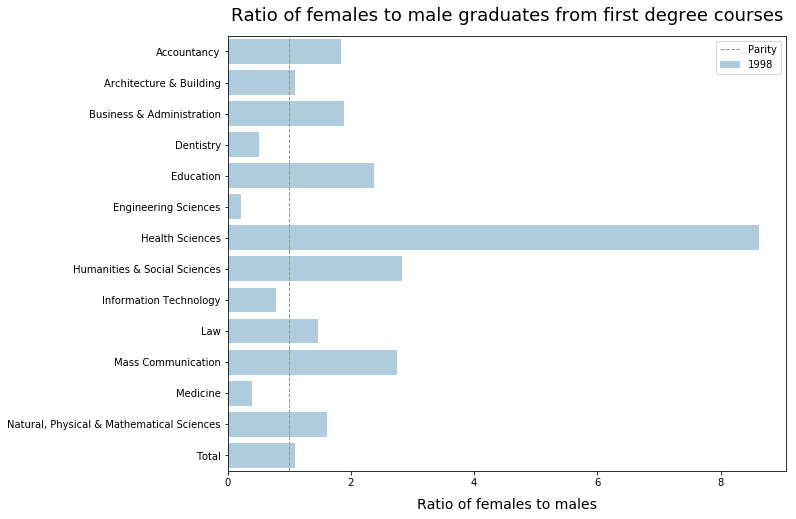

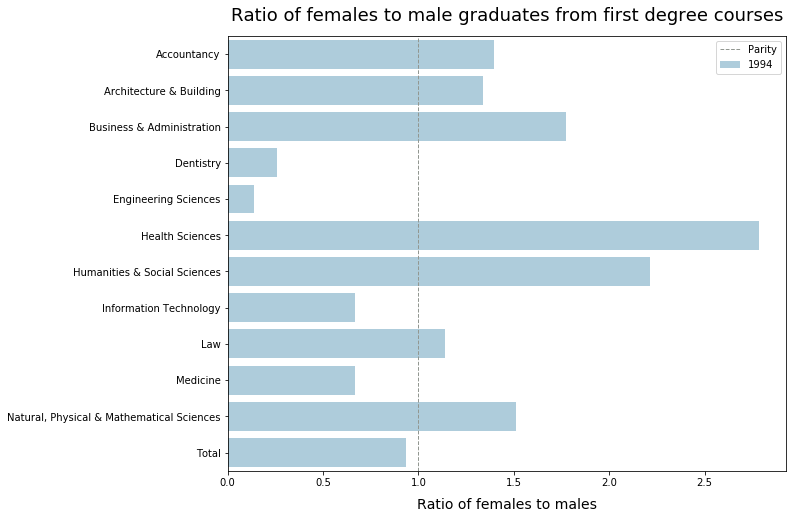

In [10]:
#plot barcharts for individual years from 2014 in decrements of 4
years = np.unique(data6_reshape['year'])[::-1]

for i in np.arange(0, len(years), 4):
    barchart_firstdegree(data6_reshape[data6_reshape['year']==years[i]])

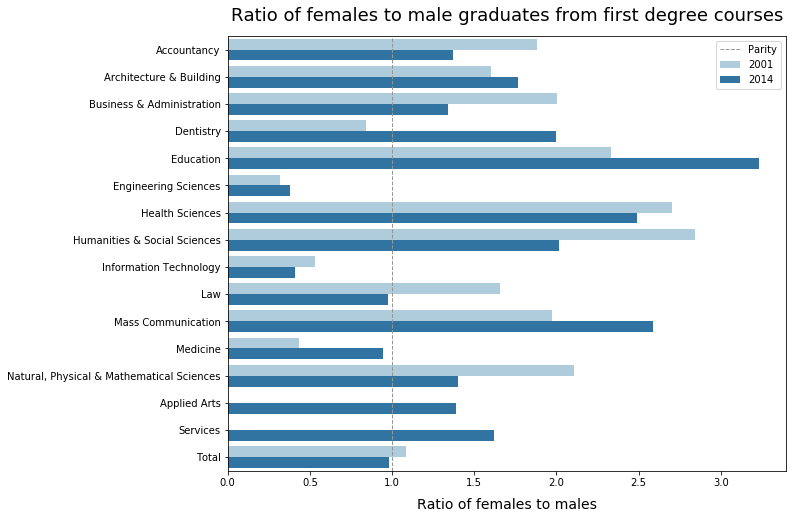

In [11]:
#plot bar charts to compare year 2001 and latest year (2014) in dataset
years = [2001,data6_reshape['year'].max()] 
barchart_firstdegree(data6_reshape[data6_reshape['year'].isin(years)])